# Joannas volcano

In [1]:
from tidyverse.dummy import *

Importing tidyverse


In [2]:
all_FCS = pd.read_csv('Candidates_2021_0609_Tum_adjNormE_TrueNorm_E07_14_20_21_24_26_v7_Rep1_Processed_2022_0810_v5.csv', sep='\t')
NE_vs_T_FC = all_FCS.query('`Comparison (group1/group2)`=="Tumor / AdjN"')
NE_vs_T_FC['log2fc'] =  NE_vs_T_FC['AVG Log2 Ratio']
NE_vs_T_FC['qvalue'] =  NE_vs_T_FC['Qvalue']
NE_vs_T_FC['gene'] =  NE_vs_T_FC['Genes']
NE_vs_T_FC = NE_vs_T_FC.drop(['ProteinGroups', 'ProteinNames', 'ProteinDescriptions','Division',
                 'Category','Valid', 'Group','Sequence Version', 'FASTAHeader', 'Database',
                 'GO Cellular Component', 'GO Biological Process', 'GO Molecular Function',
                'FASTAName', 'GO Cellular Component: "Extracellular"?', 'Organisms', 'Protein Existence', 'UniProtIds',
                '[DEPRECATED] AVG Log2 Ratio','[DEPRECATED] Absolute AVG Log2 Ratio','[DEPRECATED] % Change','[DEPRECATED] Ratio'], axis=1)
NE_vs_T_FC.head()

/tmp/ipykernel_2400602/2184050041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2400602/2184050041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2400602/2184050041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Genes,Comparison (group1/group2),Condition Numerator,Condition Denominator,# of Ratios,AVG Group Quantity Denominator,AVG Group Quantity Numerator,AVG Log2 Ratio,Absolute AVG Log2 Ratio,% Change,...,Standard Deviation,Pvalue,Qvalue,Degrees Of Freedom,Standard Error,# Unique Total Peptides,# Unique Total EG.Id,log2fc,qvalue,gene
2,IPO5,Tumor / AdjN,Tumor,AdjN,88,720.968018,1182.070801,0.71,0.71,63.96,...,0,0.0675,0.1860,87,0.273079,62,120,0.71,0.1860,IPO5
5,PRPF6,Tumor / AdjN,Tumor,AdjN,16,86.697815,350.576721,2.02,2.02,304.37,...,0,0.1730,0.3170,15,0.632095,43,55,2.02,0.3170,PRPF6
8,SEC31A,Tumor / AdjN,Tumor,AdjN,64,839.438477,1355.540771,0.69,0.69,61.48,...,0,0.0201,0.0864,63,0.290848,51,78,0.69,0.0864,SEC31A
11,SERPINC1,Tumor / AdjN,Tumor,AdjN,28,2173.051025,594.816406,-1.87,1.87,-72.63,...,0,0.3780,0.4520,27,0.523949,31,70,-1.87,0.4520,SERPINC1
14,SERPINA1,Tumor / AdjN,Tumor,AdjN,56,3546.158203,1649.904907,-1.10,1.10,-53.47,...,0,0.0252,0.1010,55,0.404711,44,85,-1.10,0.1010,SERPINA1


In [3]:
def _color_log2fc(x):
    if x>np.log2(1.5):
        return 'up'
    if x<-np.log2(1.5):
        return 'down'
    return 'nonsig'
NE_vs_T_FC['up_or_down'] = NE_vs_T_FC.log2fc.apply(_color_log2fc)
NE_vs_T_FC.loc[NE_vs_T_FC.qvalue>0.001, 'up_or_down'] = 'nonsig'

cmap_updown = {
    'up': 'red',
    'down':'blue',
    'nonsig':'grey'
}

In [4]:
genes_of_interest = ['POSTN','KRT13','FGA','FGB','FGG','DSP','AHNAK',
                     'KRT6C','KRT5','KRT13','KRT4','DES', 'PRG2', 'PRG3', 'FLNC','FBN1', 'COPG1','COPA', 'PLEC','MYH11'
                    'COL6A1','COL6A2','COL6A3','COL7A1', 'COL14A1',
                     'IGHA2','IGKC', 'FBN1']

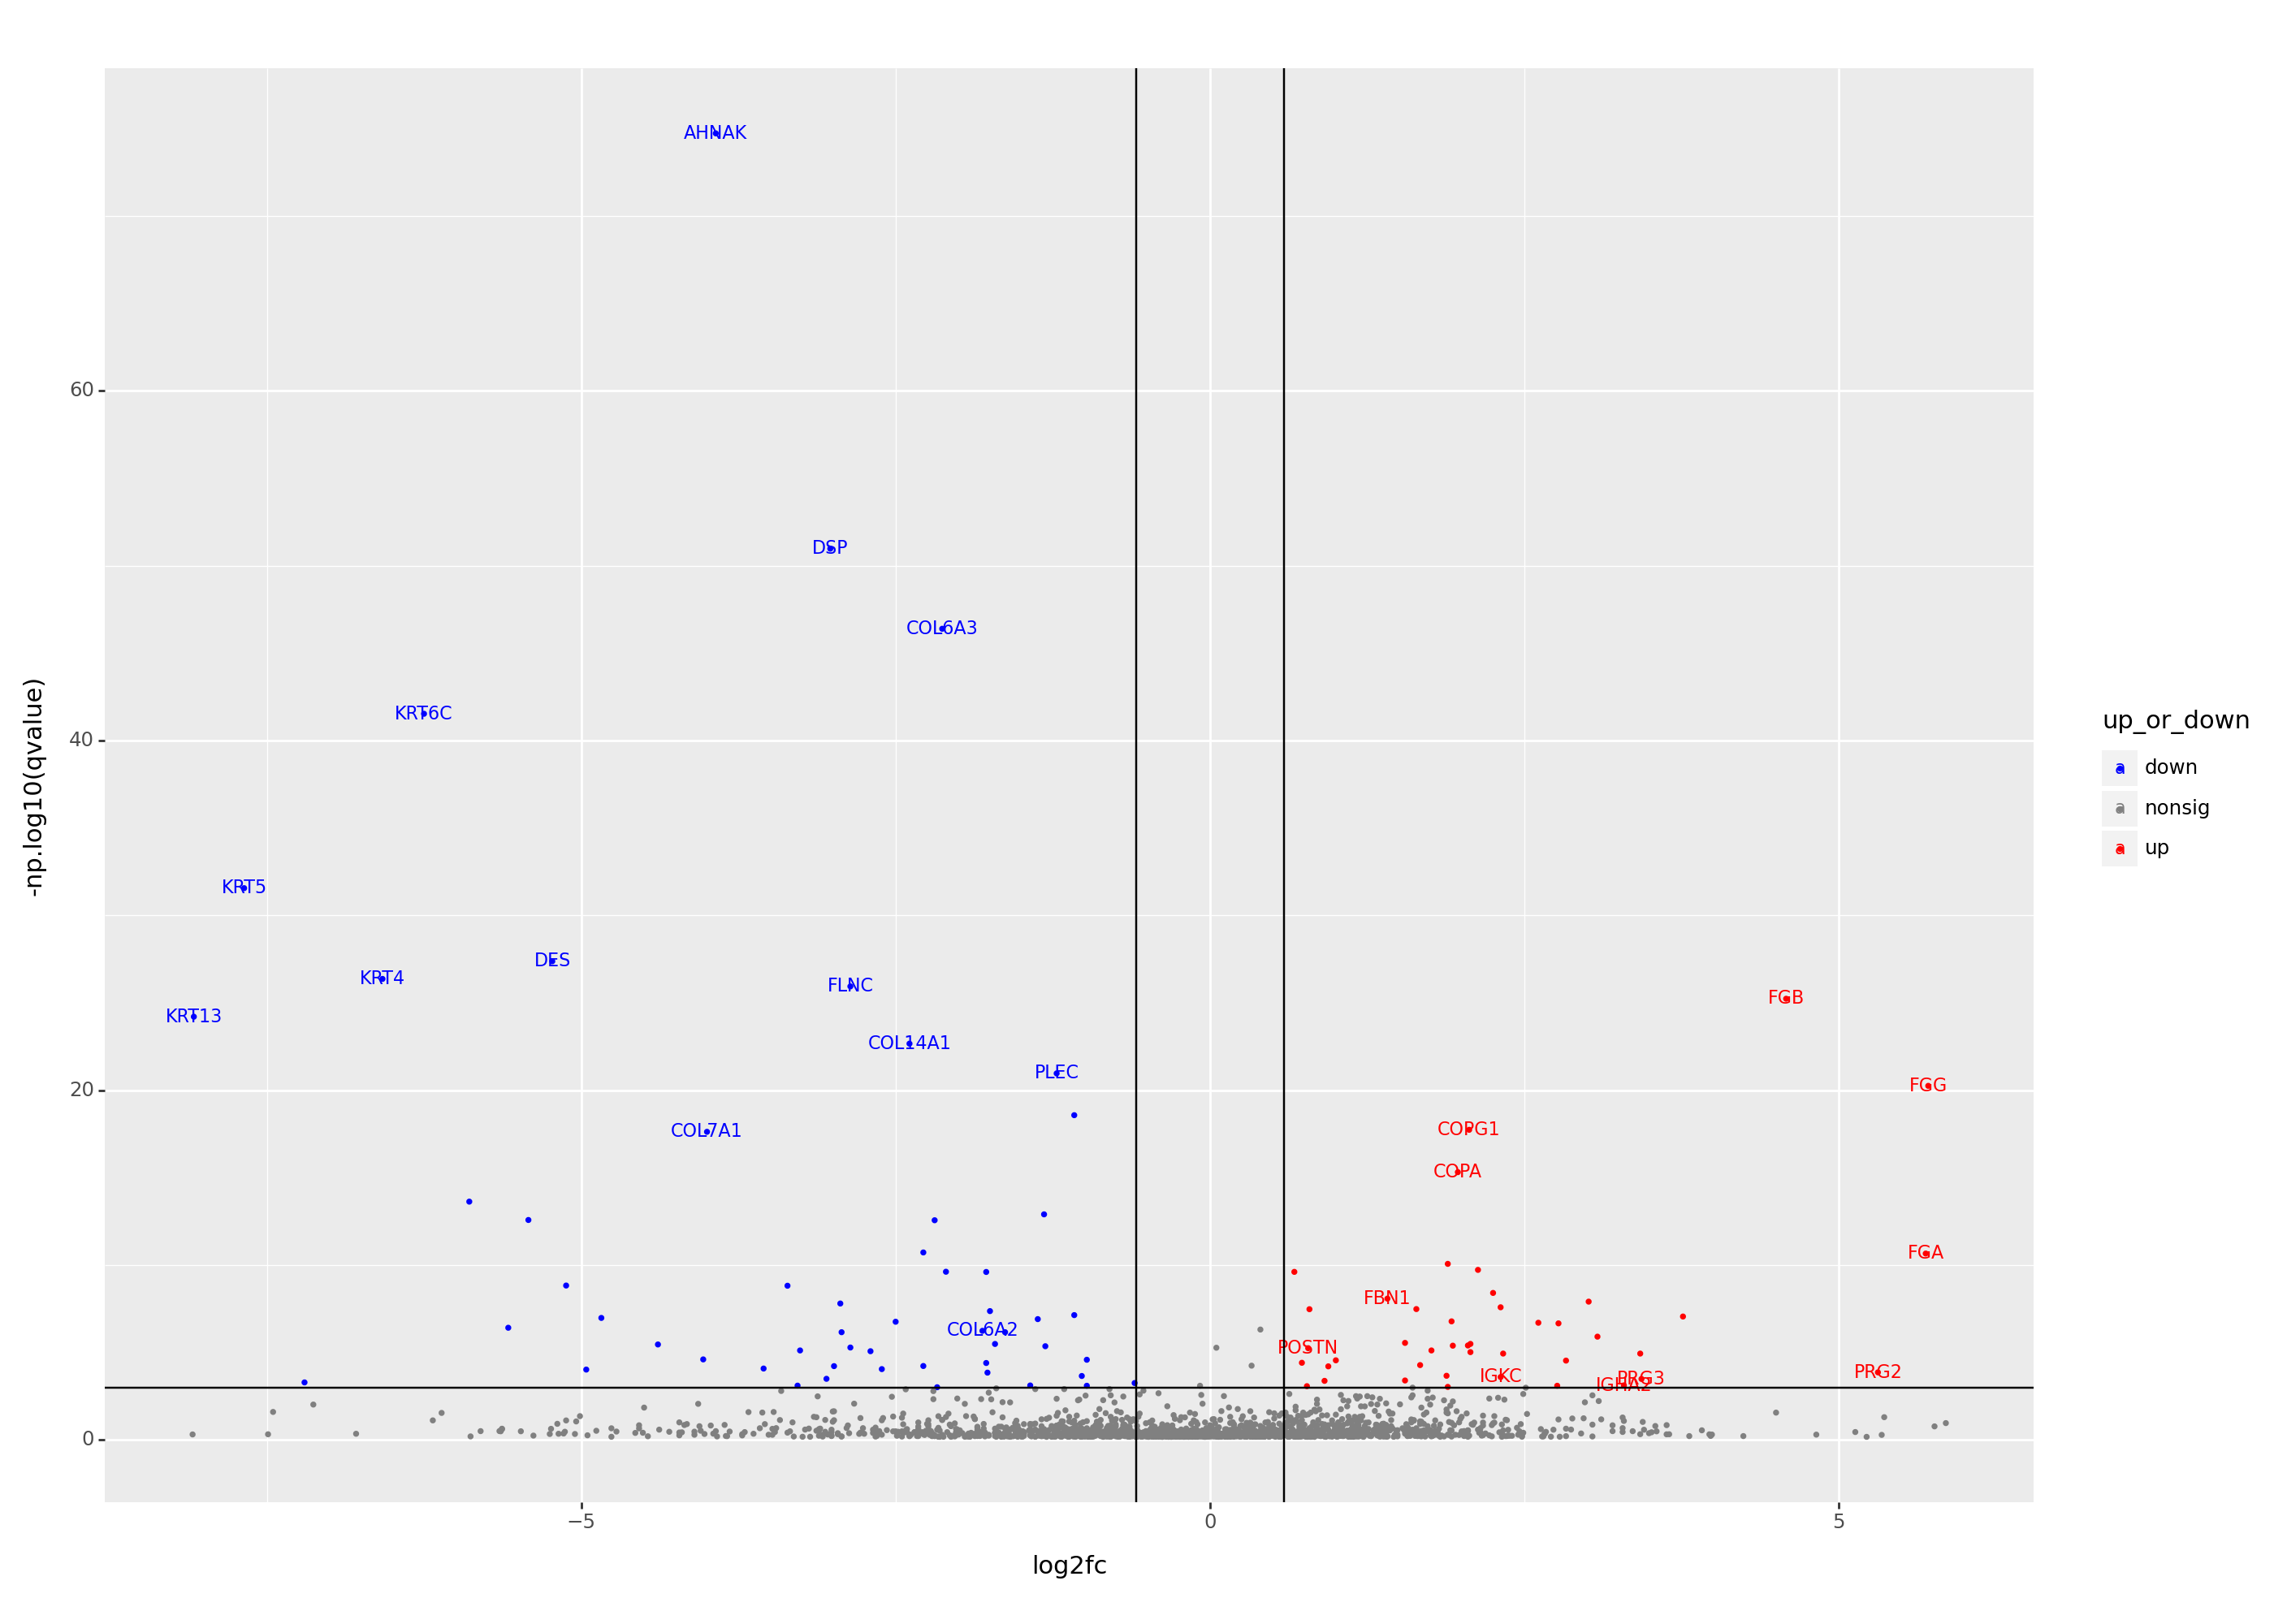

<Figure Size: (1400 x 1000)>

In [5]:
NE_vs_T_FC['qvalue_clipped'] = np.clip(NE_vs_T_FC['qvalue'], 1e-40,1 )

pn.ggplot(NE_vs_T_FC, pn.aes('log2fc', '-np.log10(qvalue)', color='up_or_down')) \
+ pn.geom_point(size=0.5) + pn.scale_color_manual(cmap_updown) + pn.geom_text(
    mapping=pn.aes(label='gene'), 
    data=NE_vs_T_FC.query('gene in @genes_of_interest'),
    size=8,
    nudge_y=0
) + pn.geom_hline(yintercept=-np.log10(0.001))+ pn.geom_vline(xintercept=[-np.log2(1.5), np.log2(1.5)]) \
+pn.theme(figure_size=(14,10)) \
# +pn.lims(y=[0,40])